<a href="https://colab.research.google.com/github/charmy2525/DataAnalytics/blob/main/5_4_Data_Classification_Session_Activity_4_Logistic_Regression_and_KNN_with_full_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Load Data

In [ ]:
import pandas as pd
cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student_ID                         943 non-null    int64  
 1   Year_of_Entry                      943 non-null    float64
 2   TCAS_channels                      943 non-null    float64
 3   Years_Living_in_BKK                943 non-null    float64
 4   Hometown_REGION                    943 non-null    object 
 5   Address_Type                       943 non-null    object 
 6   Where_to_stay                      943 non-null    object 
 7   Time_spent_for_traveling           943 non-null    int64  
 8   InternetAccess_at_Home             943 non-null    object 
 9   Living_expenses                    943 non-null    int64  
 10  Type_of_prior_school               943 non-null    object 
 11  Prior_School_Province_REGION       943 non-null    object 

## Data Clustering using K-Mean

For n_clusters = 2 The average silhouette_score is : 0.4374106074498621
For n_clusters = 3 The average silhouette_score is : 0.44284089434326834
For n_clusters = 4 The average silhouette_score is : 0.4450477705229393
For n_clusters = 5 The average silhouette_score is : 0.4213338500259565
For n_clusters = 6 The average silhouette_score is : 0.4218527473312908
For n_clusters = 7 The average silhouette_score is : 0.38483560805752537
For n_clusters = 8 The average silhouette_score is : 0.395750736066849
For n_clusters = 9 The average silhouette_score is : 0.40357761447071333
For n_clusters = 10 The average silhouette_score is : 0.3808139786941362


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


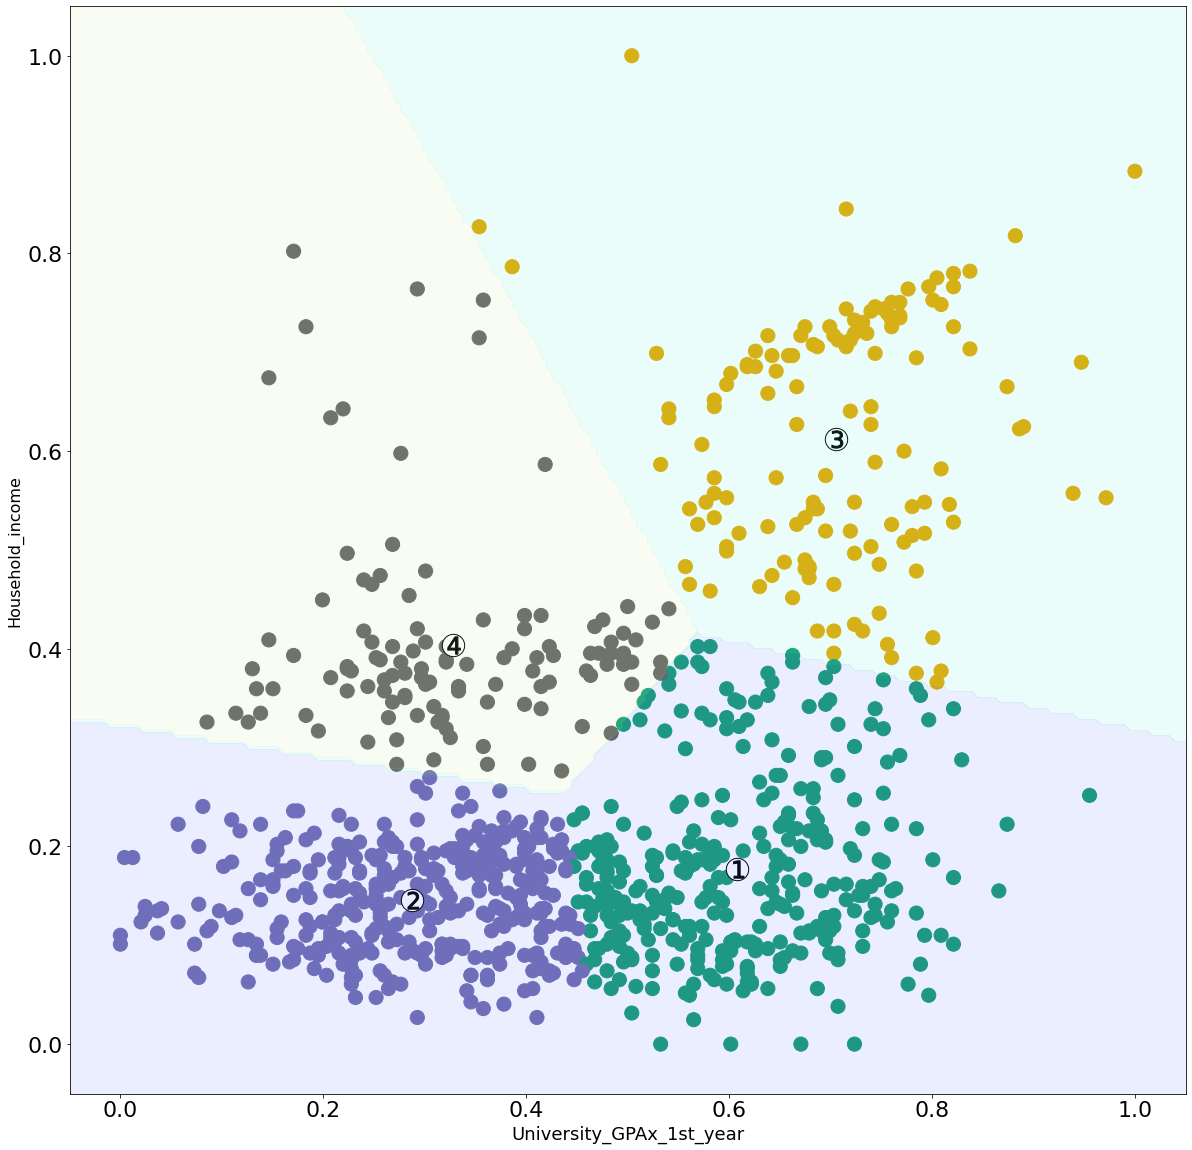

In [ ]:
feature = ['University_GPAx_1st_year','Household_income']
df2=df[feature].copy()
df2 = df2.apply(pd.to_numeric)
normalized_df=(df2-df2.min())/(df2.max()-df2.min())

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt

min_k = 2
max_k = 10
range_n_clusters = range(min_k,max_k+1)
silhouette_array = []
x_max = min_k
y_max = -1

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(normalized_df)
    cluster_labels = kmeans.fit_predict(normalized_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    if silhouette_avg >= y_max :
      x_max = n_clusters
      y_max = silhouette_avg
    silhouette_array.append(silhouette_avg)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)

n_clusters = x_max
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(normalized_df)
cluster_labels = kmeans.fit_predict(normalized_df)
centroids = kmeans.cluster_centers_
cluster_df=normalized_df.copy()
cluster_df['cluster']=cluster_labels.copy()

plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 22})
plt.scatter(cluster_df[feature[0]], cluster_df[feature[1]], marker="o",c=cluster_df['cluster'],cmap='Dark2', alpha=50,s=200)

plt.scatter(centroids[:,0], centroids[:,1], marker="o",c="white", alpha=1, s=500, edgecolor="k")
for i, c in enumerate(centroids):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k",c='black')   
plt.xlabel(feature[0], fontsize=18)
plt.ylabel(feature[1], fontsize=16)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

import numpy as np
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results
n_classes = len(np.unique(cluster_labels))
contours = plt.gca().contourf(xx, yy, Z, alpha=0.1,levels=np.arange(n_classes + 1),cmap='rainbow',zorder=1)
plt.gca().set(xlim=xlim, ylim=ylim)

plt.show()

## Classification by Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, cluster_labels, test_size=0.2, random_state=42,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

from sklearn import metrics
import math

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

print('precision of Logistic Regression : ',precision_score(y_test, y_pred,average='weighted'))
pred = []
run_len=10
print('coefficient = ',logreg.coef_,' intercept = ',logreg.intercept_)
#ตรวจสอบ ความถูกต้อง

import numpy as np

if not isinstance(X_test,(np.ndarray)) :
  X_test=X_test.to_numpy() 
for i in range(run_len):
  value = 1/(1+math.e**-(np.matmul(logreg.coef_,X_test[i].transpose())+logreg.intercept_))
  print(value)
  if len(value) == 1:
    k = 1 if value > 0.5 else 0
  else:
    k=0
    for j in range(1,len(value)) : 
      if value[j] >= value[k] :      
        k=j
    pred.append(k)
  print(k)

if len(value) == 1:
  print(f'It will be category 0 if p is greater than 0.5, p = 1/(1+e^-({logreg.intercept_[0]}+{logreg.coef_[0][0]}(X)+{logreg.coef_[0][1]}(Y))')
  print(f'It will be category 1 if p is equal or less than 0.5, p = 1/(1+e^-({logreg.intercept_[0]}+{logreg.coef_[0][0]}(X)+{logreg.coef_[0][1]}(Y))')
else:
  for j in range(0,len(value)) : 
    print(f'It will be category {j+1} if p{j+1} is maximum, p{j} = 1/(1+e^-({logreg.intercept_[0]}+{logreg.coef_[j][0]}(X)+{logreg.coef_[j][1]}(Y))')

Train Shape X: (754, 2) Y : (754,)
Test Shape X: (189, 2) Y : (189,)’
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       0.91      1.00      0.95        73
           2       1.00      0.96      0.98        27
           3       1.00      0.57      0.72        23

    accuracy                           0.94       189
   macro avg       0.96      0.88      0.91       189
weighted avg       0.95      0.94      0.94       189

precision of Logistic Regression :  0.9462490551776265
coefficient =  [[ 6.39789487 -5.21914574]
 [-6.54941824 -6.10083635]
 [ 4.68720957  6.73340994]
 [-4.5356862   4.58657215]]  intercept =  [-0.92041329  5.10692733 -4.91511461  0.72860056]
[0.51126334 0.12173648 0.80451029 0.62628239]
2
[0.85580386 0.51323547 0.30476685 0.26715194]
0
[0.84900616 0.34581449 0.45603806 0.28637901]
0
[0.57468172 0.8200165  0.13453475 0.51099995]
1
[0.49428271 0.9582646  0.03609331 0.54338634]
1
[0.85485693 

การประเมินประสิทธิภาพของการ Classification https://en.wikipedia.org/wiki/Precision_and_recall

## Confusion Matrix

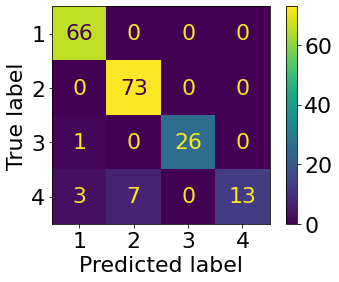

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = range(1,len(value)+1))

cm_display.plot()
plt.show()

# KNN (K-Nearest Neighbor)

## Load Data

In [ ]:
import pandas as pd
cleand_data_csv = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20output%20after%20data%20cleaning.csv'
data_file ='https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20data.csv'
df = pd.read_csv(cleand_data_csv)
#df = pd.read_csv(data_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student_ID                         943 non-null    int64  
 1   Year_of_Entry                      943 non-null    float64
 2   TCAS_channels                      943 non-null    float64
 3   Years_Living_in_BKK                943 non-null    float64
 4   Hometown_REGION                    943 non-null    object 
 5   Address_Type                       943 non-null    object 
 6   Where_to_stay                      943 non-null    object 
 7   Time_spent_for_traveling           943 non-null    int64  
 8   InternetAccess_at_Home             943 non-null    object 
 9   Living_expenses                    943 non-null    int64  
 10  Type_of_prior_school               943 non-null    object 
 11  Prior_School_Province_REGION       943 non-null    object 

## Data Clustering using K-Mean

For n_clusters = 2 The average silhouette_score is : 0.4374106074498621
For n_clusters = 3 The average silhouette_score is : 0.44284089434326834
For n_clusters = 4 The average silhouette_score is : 0.4450477705229393
For n_clusters = 5 The average silhouette_score is : 0.4213338500259565
For n_clusters = 6 The average silhouette_score is : 0.4218527473312908
For n_clusters = 7 The average silhouette_score is : 0.38483560805752537
For n_clusters = 8 The average silhouette_score is : 0.395750736066849
For n_clusters = 9 The average silhouette_score is : 0.40357761447071333
For n_clusters = 10 The average silhouette_score is : 0.3808139786941362


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


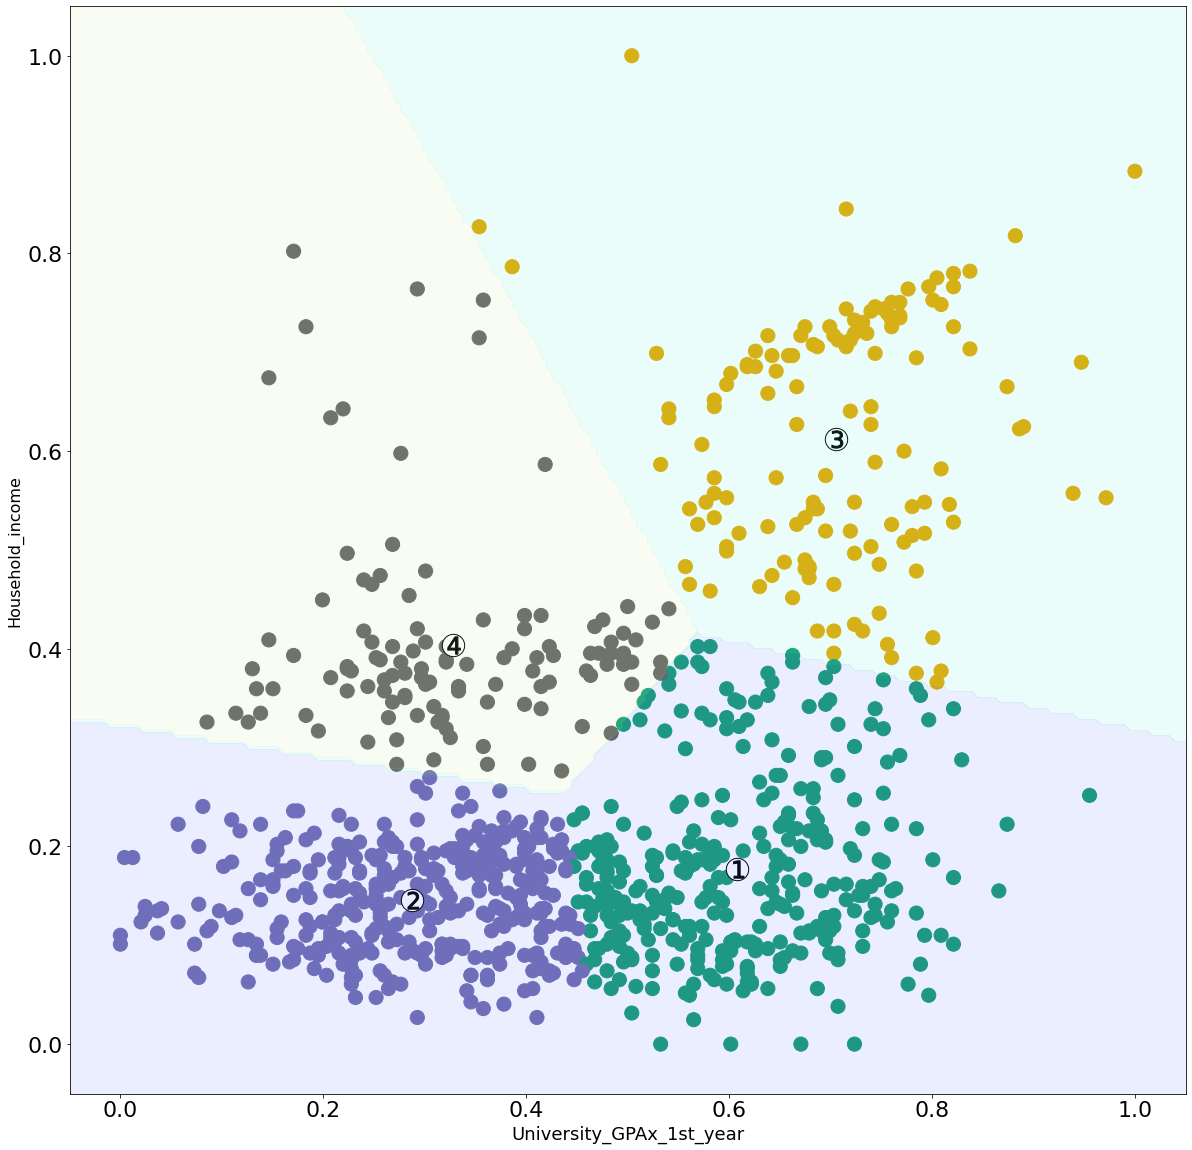

In [ ]:
feature = ['University_GPAx_1st_year','Household_income']
df2=df[feature].copy()
df2 = df2.apply(pd.to_numeric)
normalized_df=(df2-df2.min())/(df2.max()-df2.min())

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt

min_k = 2
max_k = 10
range_n_clusters = range(min_k,max_k+1)
silhouette_array = []
x_max = min_k
y_max = -1

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(normalized_df)
    cluster_labels = kmeans.fit_predict(normalized_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    if silhouette_avg >= y_max :
      x_max = n_clusters
      y_max = silhouette_avg
    silhouette_array.append(silhouette_avg)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)

n_clusters = x_max
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
kmeans.fit(normalized_df)
cluster_labels = kmeans.fit_predict(normalized_df)
centroids = kmeans.cluster_centers_
cluster_df=normalized_df.copy()
cluster_df['cluster']=cluster_labels.copy()

plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 22})
plt.scatter(cluster_df[feature[0]], cluster_df[feature[1]], marker="o",c=cluster_df['cluster'],cmap='Dark2', alpha=50,s=200)

plt.scatter(centroids[:,0], centroids[:,1], marker="o",c="white", alpha=1, s=500, edgecolor="k")
for i, c in enumerate(centroids):
  plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=300, edgecolor="k",c='black')   
plt.xlabel(feature[0], fontsize=18)
plt.ylabel(feature[1], fontsize=16)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a color plot with the results
n_classes = len(np.unique(cluster_labels))
contours = plt.gca().contourf(xx, yy, Z, alpha=0.1,levels=np.arange(n_classes + 1),cmap='rainbow',zorder=1)
plt.gca().set(xlim=xlim, ylim=ylim)

plt.show()

## Classification by KNN (K-Nearest Neighbor) : Equally weighted

Train Shape X: (754, 2) Y : (754,)
Test Shape X: (189, 2) Y : (189,)’
Maximum accuracy:- 1.0 at K = 9


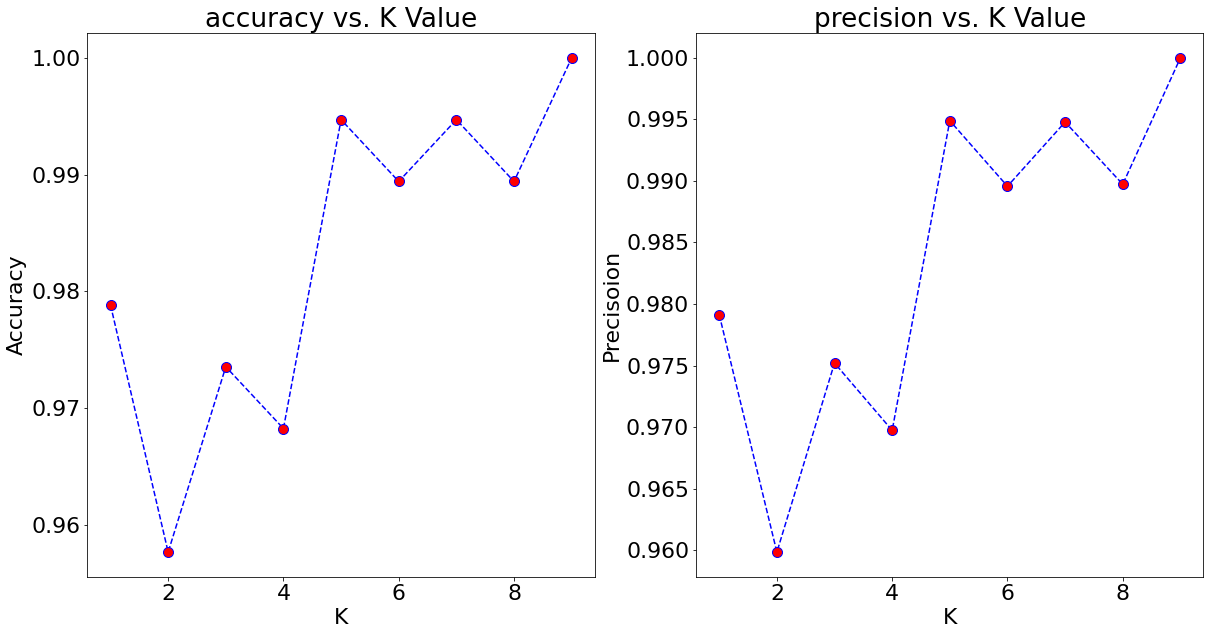

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        23

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189

precision of Logistic Regression :  1.0



category of new data is  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, cluster_labels, test_size=0.2, random_state=12,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.neighbors import KNeighborsClassifier

acc = []
pcs=[]
# Will take some time
from sklearn import metrics
n_min = 1
n_max = 10

for n_neighbors in range(n_min,n_max):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors,metric='euclidean')
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  pcs.append(precision_score(y_test, y_pred,average='weighted'))

import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(range(n_min,n_max),acc,color = 'blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
ax1.set_title('accuracy vs. K Value')
ax1.set_xlabel('K')
ax1.set_ylabel('Accuracy')
ax2.plot(range(n_min,n_max),pcs,color = 'blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
ax2.set_title('precision vs. K Value')
ax2.set_xlabel('K')
ax2.set_ylabel('Precisoion')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+n_min)
plt.show()

knn = KNeighborsClassifier(n_neighbors =acc.index(max(acc))+n_min,metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)



print(classification_report(y_test, y_pred))
print('precision of Logistic Regression : ',precision_score(y_test, y_pred,average='weighted'))

print('\n')
newdata = np.array([[50,40]])
sample_pred=knn.predict(newdata)
print('\ncategory of new data is ',sample_pred[0]+1)

การประเมินประสิทธิภาพของการ Classification https://en.wikipedia.org/wiki/Precision_and_recall

## Confusion Matrix

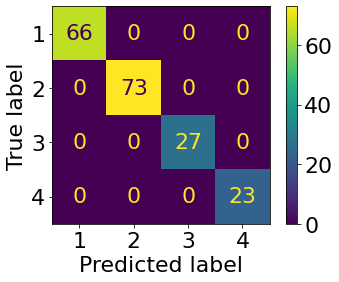

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = range(1,len(centroids[:,0])+1))

cm_display.plot()
plt.show()

## Classification by KNN (K-Nearest Neighbor) : Distance weighted

Train Shape X: (754, 2) Y : (754,)
Test Shape X: (189, 2) Y : (189,)’
Maximum accuracy:- 0.9947089947089947 at K = 6


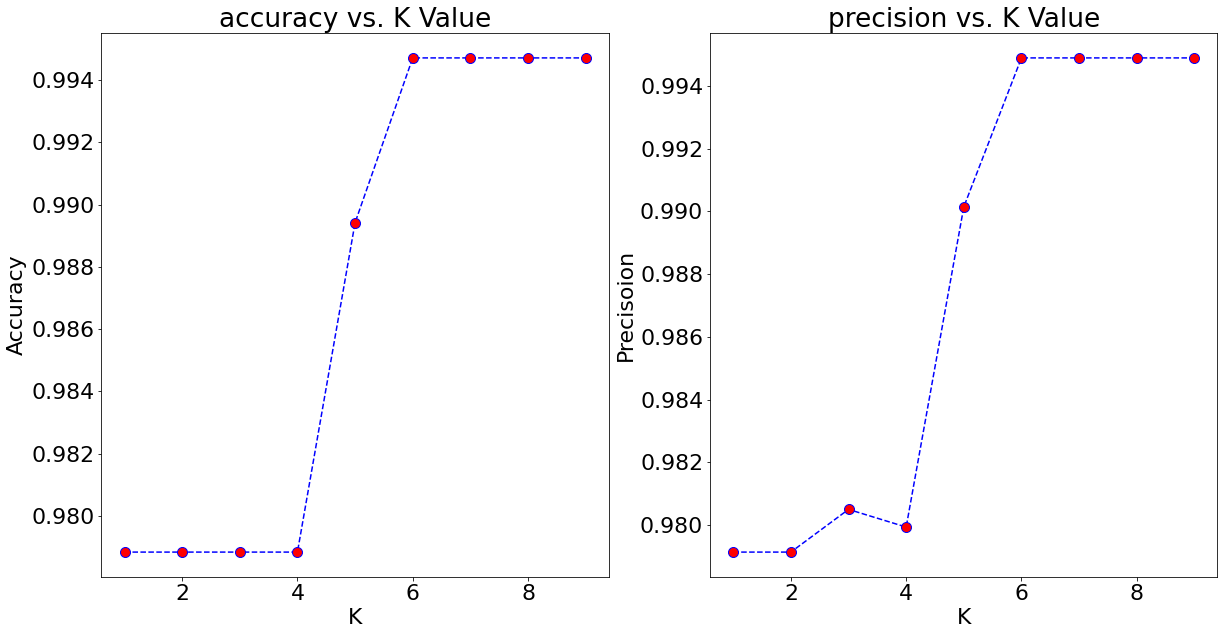

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        73
           2       0.96      1.00      0.98        27
           3       1.00      0.96      0.98        23

    accuracy                           0.99       189
   macro avg       0.99      0.99      0.99       189
weighted avg       0.99      0.99      0.99       189

precision of Logistic Regression :  0.9948979591836734



category of new data is  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, cluster_labels, test_size=0.2, random_state=12,stratify=cluster_labels)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}’'.format(X_test.shape,y_test.shape))

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.neighbors import KNeighborsClassifier

acc = []
pcs=[]
# Will take some time
from sklearn import metrics
n_min = 1
n_max = 10

for n_neighbors in range(n_min,n_max):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = 'distance',metric='euclidean')
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  pcs.append(precision_score(y_test, y_pred,average='weighted'))

import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.plot(range(n_min,n_max),acc,color = 'blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
ax1.set_title('accuracy vs. K Value')
ax1.set_xlabel('K')
ax1.set_ylabel('Accuracy')
ax2.plot(range(n_min,n_max),pcs,color = 'blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
ax2.set_title('precision vs. K Value')
ax2.set_xlabel('K')
ax2.set_ylabel('Precisoion')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+n_min)
plt.show()

knn = KNeighborsClassifier(n_neighbors =acc.index(max(acc))+n_min, weights = 'distance',metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)



print(classification_report(y_test, y_pred))
print('precision of Logistic Regression : ',precision_score(y_test, y_pred,average='weighted'))

print('\n')
newdata = np.array([[50,40]])
sample_pred=knn.predict(newdata)
print('\ncategory of new data is ',sample_pred[0]+1)

การประเมินประสิทธิภาพของการ Classification https://en.wikipedia.org/wiki/Precision_and_recall

## Confusion Matrix

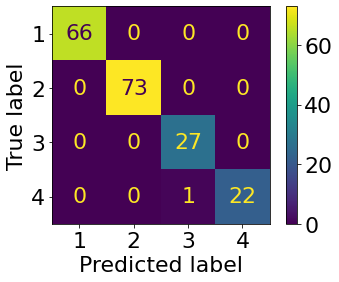

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = range(1,len(centroids[:,0])+1))

cm_display.plot()
plt.show()